### Importación de datos



In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


In [2]:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [3]:
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [4]:
df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'], errors='coerce', dayfirst=True)

In [5]:
df_tiendas.head()
df_tiendas.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,datetime64[ns]
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#Análisis Exploratorio de Ventas y Rendimiento de Tiendas (2020–2023)

##1. Análisis de facturación



### Facturacion total por tienda


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

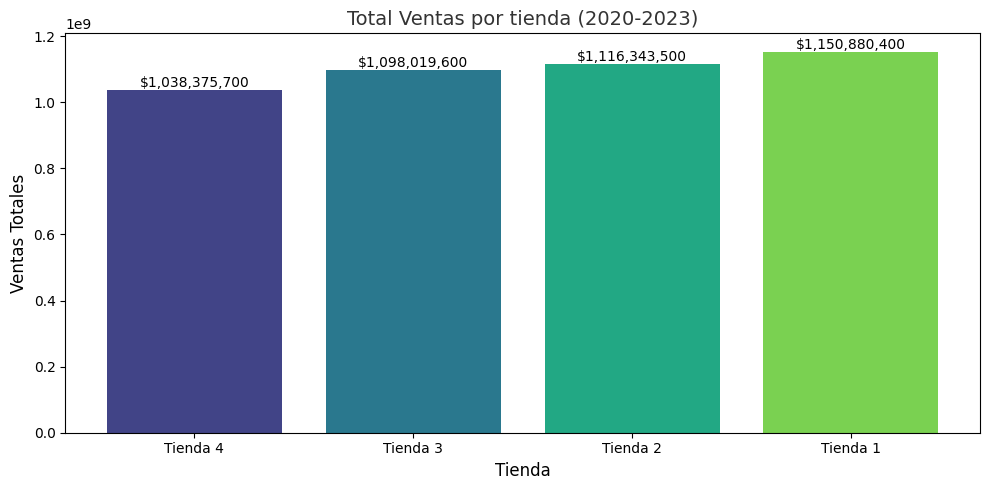

In [95]:
ventas_por_tienda = df_tiendas.groupby('tienda')['Precio'].sum().sort_values()
palette = sns.color_palette("viridis", len(ventas_por_tienda))
colores = palette

plt.figure(figsize=(10, 5))
plt.bar(ventas_por_tienda.index, ventas_por_tienda.values, color=colores)

plt.title('Total Ventas por tienda (2020-2023)', fontsize=14, color='#333333')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)

for i, value in enumerate(ventas_por_tienda.values):
    plt.text(i, value, f"${value:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

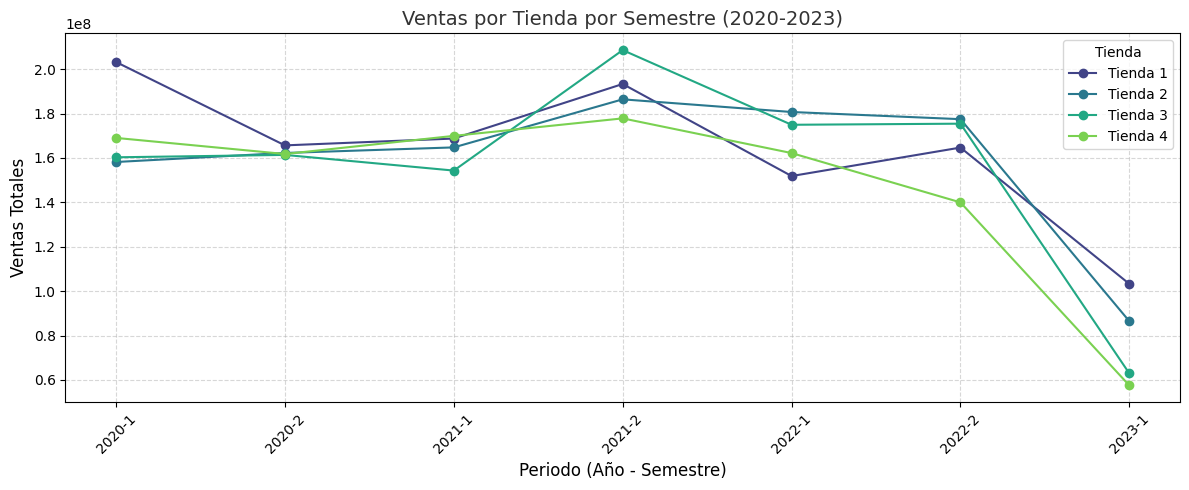

In [96]:
df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'], errors='coerce')
df_tiendas['Año'] = df_tiendas['Fecha de Compra'].dt.year
df_tiendas['Semestre'] = df_tiendas['Fecha de Compra'].dt.month.apply(lambda m: 1 if m <= 6 else 2)
df_tiendas['Periodo'] = df_tiendas['Año'].astype(str) + '-' + df_tiendas['Semestre'].astype(str)


ventas_por_semestre = df_tiendas.groupby(['tienda', 'Periodo'])['Precio'].sum().unstack().fillna(0)
ventas_por_semestre = ventas_por_semestre[sorted(ventas_por_semestre.columns)]
palette = sns.color_palette("viridis", len(ventas_por_semestre.index))

plt.figure(figsize=(12, 5))

for color, tienda in zip(palette, ventas_por_semestre.index):
    plt.plot(ventas_por_semestre.columns, ventas_por_semestre.loc[tienda],
             marker='o', label=tienda, color=color)

plt.title('Ventas por Tienda por Semestre (2020-2023)', fontsize=14, color='#333333')
plt.xlabel('Periodo (Año - Semestre)', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)

plt.legend(title='Tienda')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [97]:
df_tiendas['Trimestre'] = df_tiendas['Fecha de Compra'].dt.to_period('Q').astype(str)
ventas_trimestrales = df_tiendas.groupby(['tienda', 'Trimestre'])['Precio'].sum().reset_index()

tabla_trimestral = ventas_trimestrales.pivot(index='Trimestre', columns='tienda', values='Precio')
##Añade separador de miles
tabla_trimestral_formateada = tabla_trimestral.applymap(lambda x: f"${x:,.0f}")

print("Totales Vendidos por Tienda Trimestralmente")
display(tabla_trimestral_formateada)


Totales Vendidos por Tienda Trimestralmente


/tmp/ipython-input-3340479239.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_trimestral_formateada = tabla_trimestral.applymap(lambda x: f"${x:,.0f}")


tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Trimestre,,,,
2020Q1,"$104,700,600","$79,034,200","$81,384,300","$70,712,200"
2020Q2,"$98,545,700","$79,165,000","$78,931,600","$98,337,300"
2020Q3,"$96,455,800","$78,148,600","$86,147,000","$86,332,300"
2020Q4,"$69,231,100","$84,118,800","$75,244,600","$75,465,900"
2021Q1,"$87,520,200","$81,104,100","$70,892,800","$92,484,700"
2021Q2,"$81,249,500","$83,674,800","$83,439,400","$77,482,600"
2021Q3,"$116,319,400","$96,566,100","$75,570,700","$92,197,600"
2021Q4,"$77,031,700","$89,870,500","$133,051,500","$85,658,700"
2022Q1,"$79,399,900","$87,642,000","$89,283,300","$97,891,500"


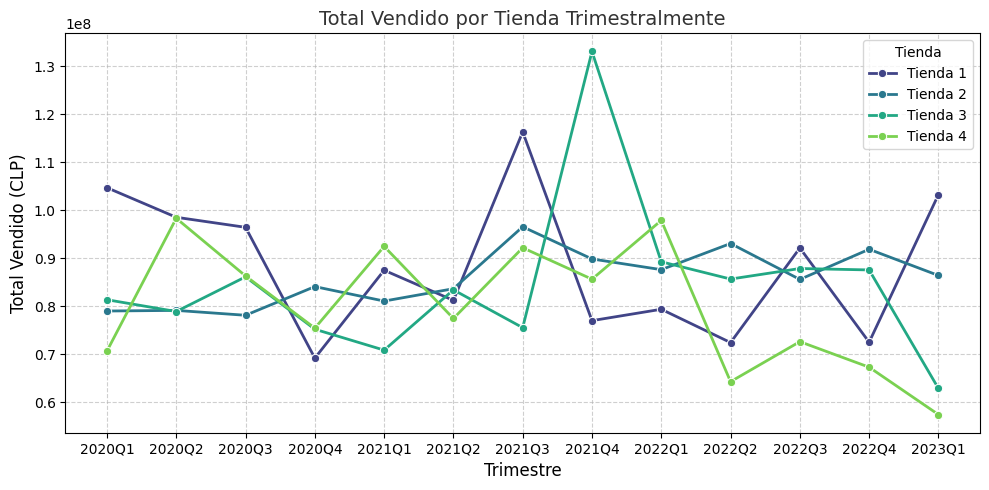

In [99]:
df_tiendas['Trimestre'] = df_tiendas['Fecha de Compra'].dt.to_period('Q').astype(str)

ventas_trimestrales = df_tiendas.groupby(['tienda', 'Trimestre'])['Precio'].sum().reset_index()

ventas_trimestrales['Trimestre'] = pd.Categorical(
    ventas_trimestrales['Trimestre'],
    categories=sorted(ventas_trimestrales['Trimestre'].unique()),
    ordered=True
)

# Crear gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=ventas_trimestrales,
    x='Trimestre',
    y='Precio',
    hue='tienda',
    marker='o',
    linewidth=2,
    palette="viridis"
)

# Personar
plt.title('Total Vendido por Tienda Trimestralmente', fontsize=14, color='#333333')
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Total Vendido (CLP)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

## 2. Ventas por categoría

Categorias mas populares

In [100]:
tabla_unidades = df_tiendas.pivot_table(
    index='Categoría del Producto',
    columns='tienda',
    values='Precio',
    aggfunc='count',
    fill_value=0
)

tabla_unidades['Total'] = tabla_unidades.sum(axis=1)
tabla_unidades = tabla_unidades.sort_values(by='Total', ascending=False)

tabla_unidades.drop(columns='Total', inplace=True)

tabla_unidades.head(9)


tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


In [101]:
tabla_unidades = df_tiendas.pivot_table(
    index='Categoría del Producto',
    columns='tienda',
    values='Precio',
    aggfunc='sum',
    fill_value=0
)

tabla_unidades['Total'] = tabla_unidades.sum(axis=1)
tabla_unidades = tabla_unidades.sort_values(by='Total', ascending=False)
tabla_ordenada = tabla_unidades.drop(columns='Total')

tabla_formateada = tabla_ordenada.applymap(lambda x: f"${x:,.0f}".replace(",", "."))

tabla_formateada.head(8)

/tmp/ipython-input-1388579843.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_formateada = tabla_ordenada.applymap(lambda x: f"${x:,.0f}".replace(",", "."))


tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Electrónicos,$429.493.500,$410.831.100,$410.775.800,$409.476.100
Electrodomésticos,$363.685.200,$348.567.800,$329.237.900,$283.260.200
Muebles,$187.633.700,$176.426.300,$201.072.100,$192.528.900
Instrumentos musicales,$91.299.000,$104.990.300,$77.380.900,$75.102.400
Deportes y diversión,$39.290.000,$34.744.500,$35.593.100,$33.350.100
Juguetes,$17.995.700,$15.945.400,$19.401.100,$20.262.200
Artículos para el hogar,$12.698.400,$14.746.900,$15.060.000,$15.074.500
Libros,$8.784.900,$10.091.200,$9.498.700,$9.321.300


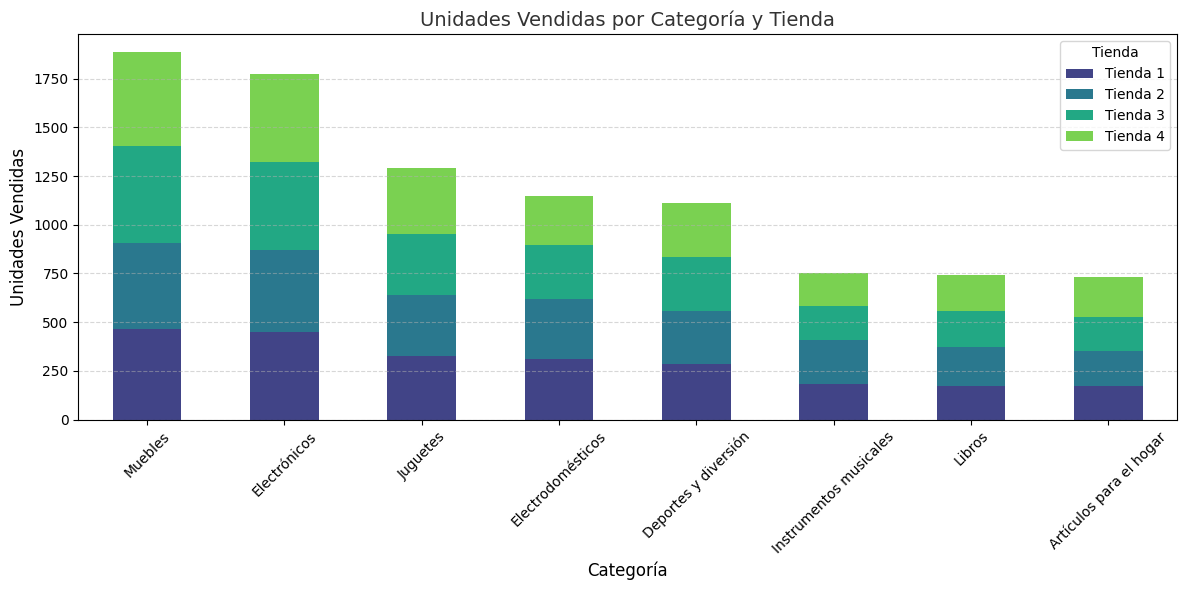

In [102]:
unidades_por_categoria = df_tiendas.groupby(['Categoría del Producto', 'tienda'])['Producto'].count().unstack(fill_value=0)

unidades_por_categoria = unidades_por_categoria.loc[
    unidades_por_categoria.sum(axis=1).sort_values(ascending=False).index
]
palette = sns.color_palette("viridis", len(unidades_por_categoria.columns))

# Crear gráfico
unidades_por_categoria.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=palette
)

plt.title('Unidades Vendidas por Categoría y Tienda', fontsize=14, color='#333333')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend(title='Tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

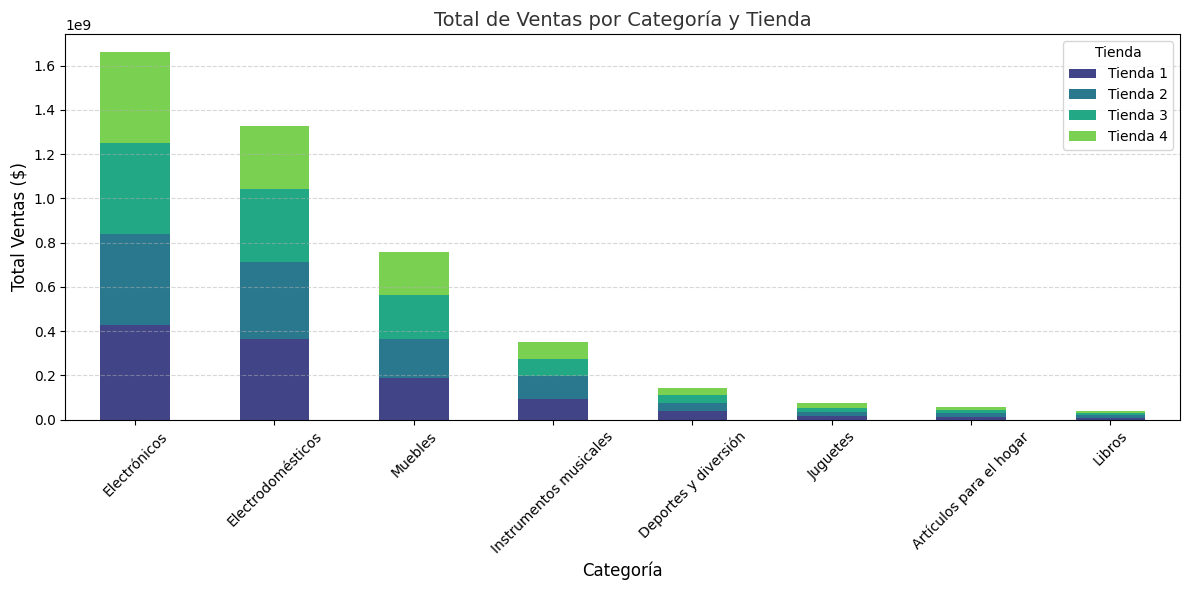

In [103]:
ventas_por_categoria = df_tiendas.groupby(['Categoría del Producto', 'tienda'])['Precio'].sum().unstack(fill_value=0)
ventas_por_categoria = ventas_por_categoria.loc[
    ventas_por_categoria.sum(axis=1).sort_values(ascending=False).index
]

palette = sns.color_palette("viridis", len(ventas_por_categoria.columns))
ventas_por_categoria.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=palette
)

plt.title('Total de Ventas por Categoría y Tienda', fontsize=14, color='#333333')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Total Ventas ($)', fontsize=12)
plt.legend(title='Tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

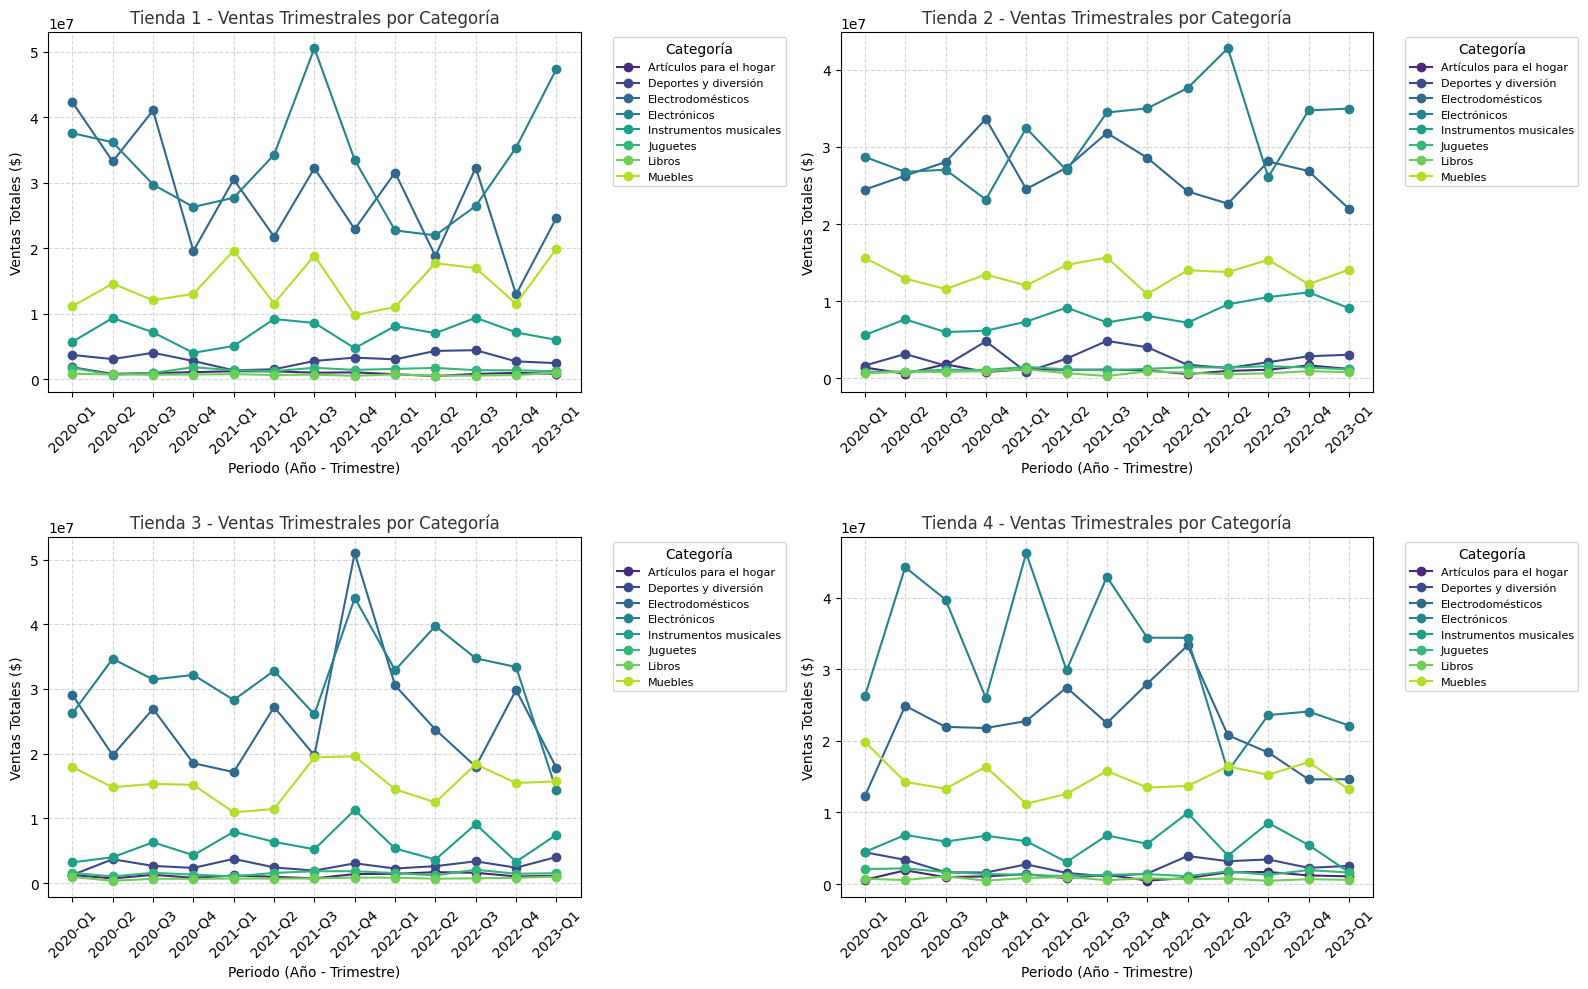

In [104]:
df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'], errors='coerce')
df_tiendas['Año'] = df_tiendas['Fecha de Compra'].dt.year

df_tiendas['Trimestre'] = df_tiendas['Fecha de Compra'].dt.quarter
df_tiendas['Periodo'] = df_tiendas['Año'].astype(str) + '-Q' + df_tiendas['Trimestre'].astype(str)

tiendas = df_tiendas['tienda'].unique()

categorias = sorted(df_tiendas['Categoría del Producto'].unique())

palette = sns.color_palette("viridis", len(categorias))
color_map = dict(zip(categorias, palette))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, tienda in enumerate(tiendas):
    df_tienda = df_tiendas[df_tiendas['tienda'] == tienda]

    ventas_trimestral_categoria = df_tienda.groupby(['Categoría del Producto', 'Periodo'])['Precio'].sum().unstack(fill_value=0)
    ventas_trimestral_categoria = ventas_trimestral_categoria[sorted(ventas_trimestral_categoria.columns)]

    ax = axs[i]  # Obtener el eje

    for categoria in ventas_trimestral_categoria.index:
        ax.plot(ventas_trimestral_categoria.columns,
                ventas_trimestral_categoria.loc[categoria],
                marker='o',
                label=categoria,
                color=color_map[categoria])
    ax.set_title(f'{tienda} - Ventas Trimestrales por Categoría', fontsize=12, color='#333333')
    ax.set_xlabel('Periodo (Año - Trimestre)', fontsize=10)
    ax.set_ylabel('Ventas Totales ($)', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

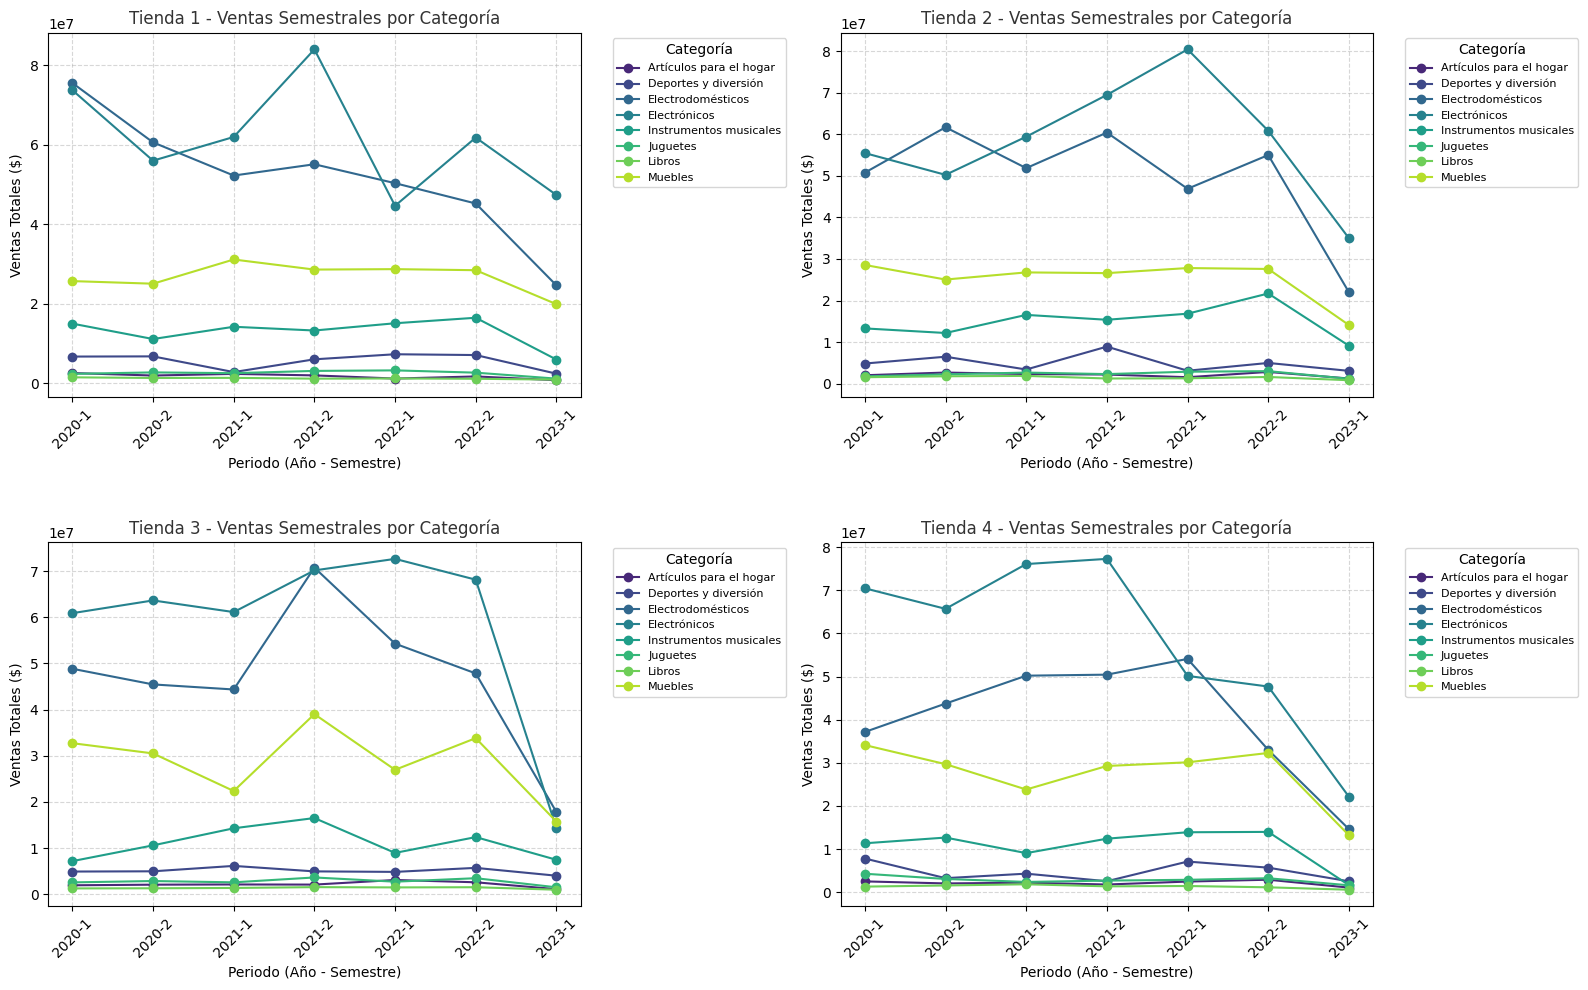

In [105]:
df_tiendas['Fecha de Compra'] = pd.to_datetime(df_tiendas['Fecha de Compra'], errors='coerce')
df_tiendas['Año'] = df_tiendas['Fecha de Compra'].dt.year
df_tiendas['Semestre'] = df_tiendas['Fecha de Compra'].dt.month.apply(lambda m: 1 if m <= 6 else 2)
df_tiendas['Periodo'] = df_tiendas['Año'].astype(str) + '-' + df_tiendas['Semestre'].astype(str)


tiendas = df_tiendas['tienda'].unique()

categorias = sorted(df_tiendas['Categoría del Producto'].unique())

palette = sns.color_palette("viridis", len(categorias))
color_map = dict(zip(categorias, palette))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, tienda in enumerate(tiendas):
    df_tienda = df_tiendas[df_tiendas['tienda'] == tienda]
    ventas_semestral_categoria = df_tienda.groupby(['Categoría del Producto', 'Periodo'])['Precio'].sum().unstack(fill_value=0)
    ventas_semestral_categoria = ventas_semestral_categoria[sorted(ventas_semestral_categoria.columns)]

    ax = axs[i]

    for categoria in ventas_semestral_categoria.index:
        ax.plot(
            ventas_semestral_categoria.columns,
            ventas_semestral_categoria.loc[categoria],
            marker='o',
            label=categoria,
            color=color_map[categoria]
        )

    ax.set_title(f'{tienda} - Ventas Semestrales por Categoría', fontsize=12, color='#333333')
    ax.set_xlabel('Periodo (Año - Semestre)', fontsize=10)
    ax.set_ylabel('Ventas Totales ($)', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

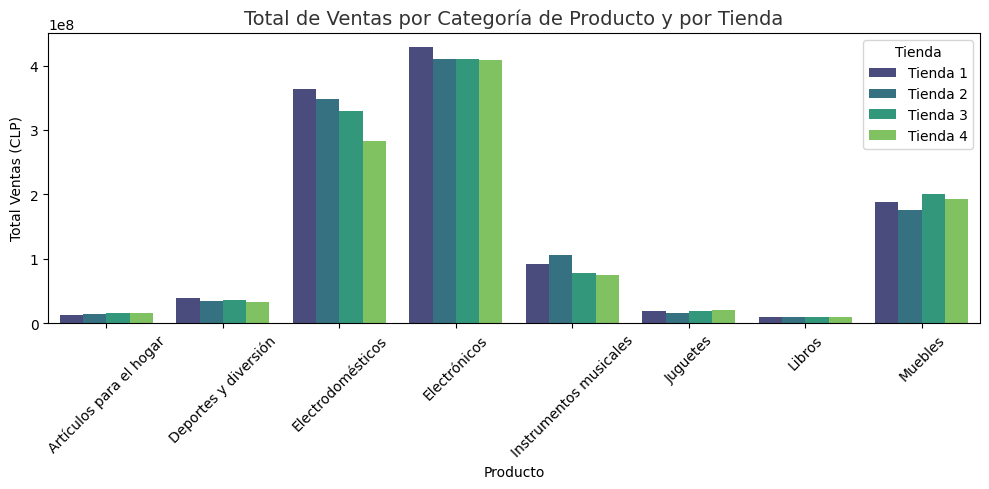

In [106]:
ventas_categoria_tienda = df_tiendas.groupby(['Categoría del Producto', 'tienda']).agg(
    Total_Ventas=('Precio', 'sum')
).reset_index()

tiendas = sorted(ventas_categoria_tienda['tienda'].unique())

paleta_colores = sns.color_palette("viridis", len(tiendas))
paleta = dict(zip(tiendas, paleta_colores))
plt.figure(figsize=(10, 5))
sns.barplot(
    data=ventas_categoria_tienda,
    x='Categoría del Producto',
    y='Total_Ventas',
    hue='tienda',
    palette=paleta
)

# Personalización
plt.title('Total de Ventas por Categoría de Producto y por Tienda', fontsize=14, color='#333333')
plt.xlabel('Producto')
plt.ylabel('Total Ventas (CLP)')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

## 3. Calificación promedio de la tienda


Promedio de calificacion de los clientes

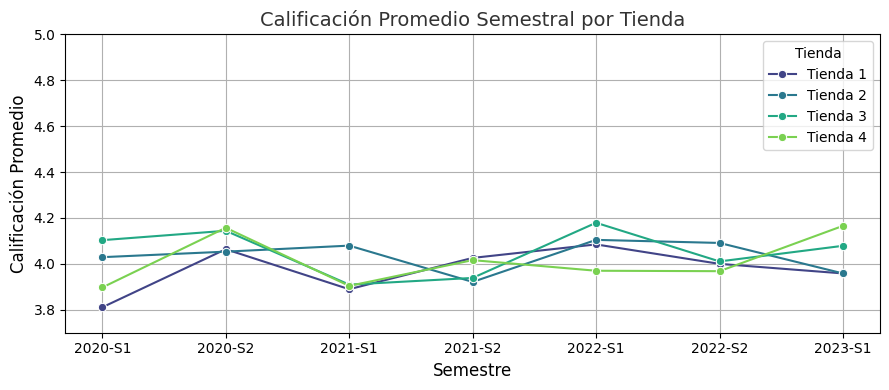

In [107]:
df_tiendas['Semestre'] = df_tiendas['Fecha de Compra'].dt.year.astype(str) + '-S' + \
                         df_tiendas['Fecha de Compra'].dt.month.apply(lambda x: '1' if x <= 6 else '2')
calificacion_semestral = df_tiendas.groupby(['tienda', 'Semestre'])['Calificación'].mean().reset_index()

calificacion_semestral['Semestre'] = pd.Categorical(calificacion_semestral['Semestre'],
                                                     ordered=True,
                                                     categories=sorted(calificacion_semestral['Semestre'].unique()))

tiendas = sorted(calificacion_semestral['tienda'].unique())

paleta_colores = sns.color_palette("viridis", len(tiendas))
paleta = dict(zip(tiendas, paleta_colores))

plt.figure(figsize=(9, 4))
sns.lineplot(
    data=calificacion_semestral,
    x='Semestre',
    y='Calificación',
    hue='tienda',
    marker='o',
    palette=paleta
)

# Personalización
plt.title('Calificación Promedio Semestral por Tienda', fontsize=14, color='#333333')
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(3.7, 5)
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

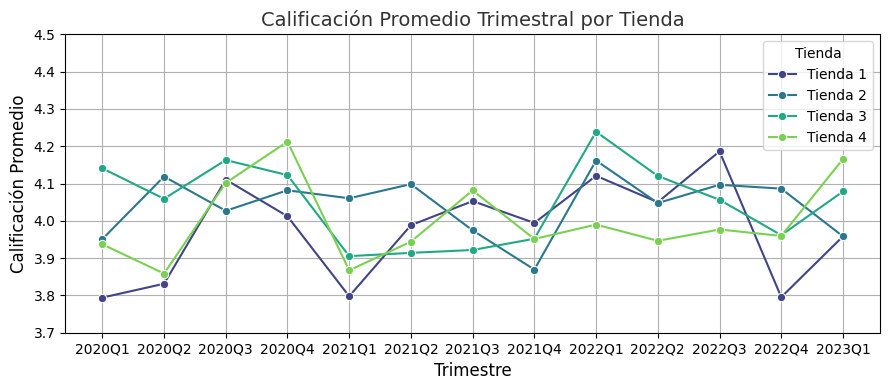

In [109]:
df_tiendas['Trimestre'] = df_tiendas['Fecha de Compra'].dt.to_period('Q').astype(str)
calificacion_trimestral = df_tiendas.groupby(['tienda', 'Trimestre'])['Calificación'].mean().reset_index()
calificacion_trimestral['Trimestre'] = pd.Categorical(
    calificacion_trimestral['Trimestre'],
    ordered=True,
    categories=sorted(calificacion_trimestral['Trimestre'].unique())
)

tiendas = sorted(calificacion_trimestral['tienda'].unique())

paleta_colores = sns.color_palette("viridis", len(tiendas))

paleta = dict(zip(tiendas, paleta_colores))

plt.figure(figsize=(9, 4))
sns.lineplot(
    data=calificacion_trimestral,
    x='Trimestre',
    y='Calificación',
    hue='tienda',
    marker='o',
    palette=paleta
)

# Personalización
plt.title('Calificación Promedio Trimestral por Tienda', fontsize=14, color='#333333')
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(3.7, 4.5)
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

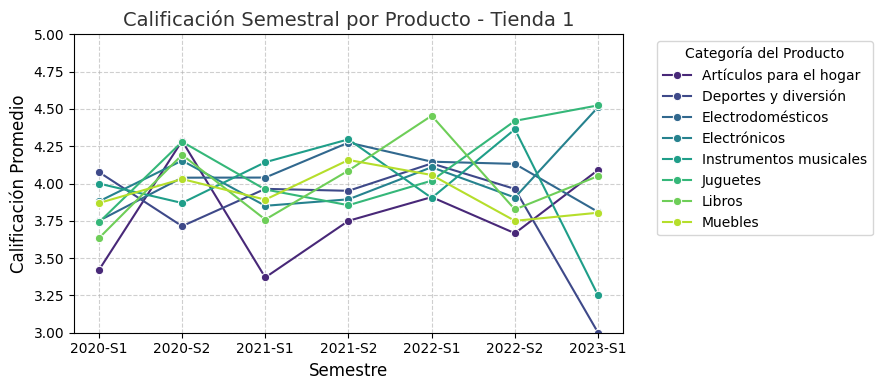

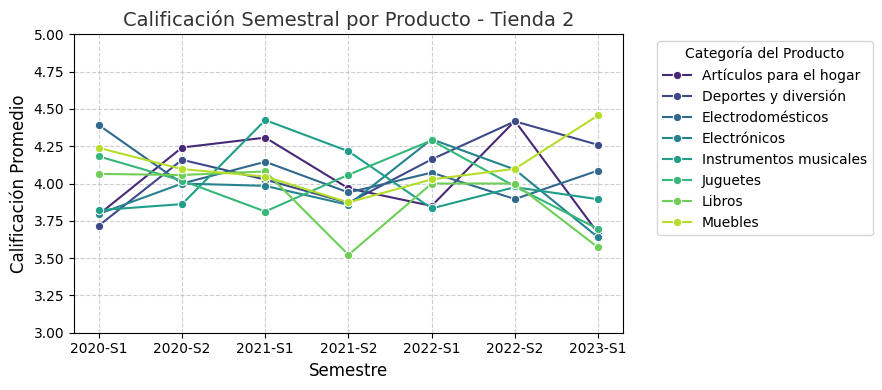

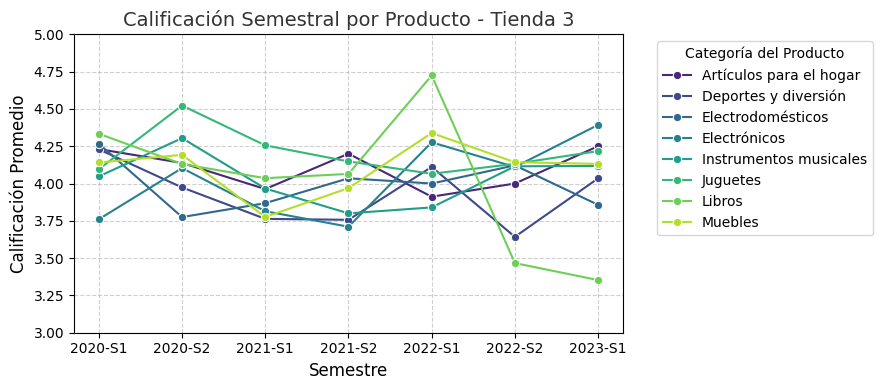

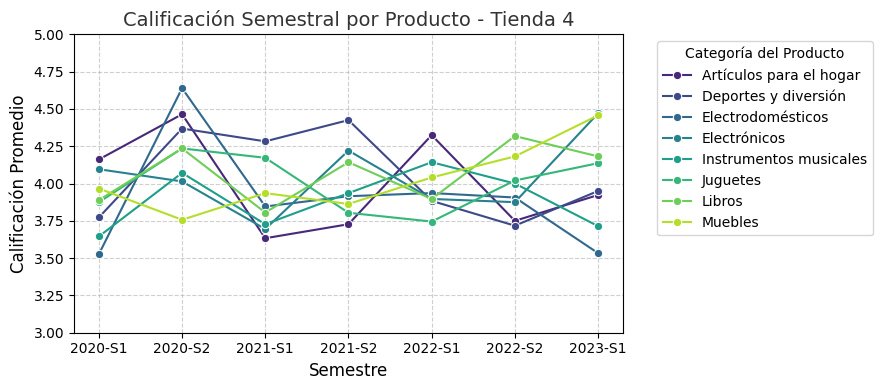

In [110]:
df_tiendas['Semestre'] = df_tiendas['Fecha de Compra'].dt.year.astype(str) + '-S' + \
                         df_tiendas['Fecha de Compra'].dt.month.apply(lambda x: '1' if x <= 6 else '2')

calificacion_categoria = df_tiendas.groupby(['tienda', 'Categoría del Producto', 'Semestre'])['Calificación'].mean().reset_index()

calificacion_categoria['Semestre'] = pd.Categorical(
    calificacion_categoria['Semestre'],
    ordered=True,
    categories=sorted(calificacion_categoria['Semestre'].unique())
)

tiendas = calificacion_categoria['tienda'].unique()

categorias = sorted(calificacion_categoria['Categoría del Producto'].unique())

palette_productos = sns.color_palette("viridis", n_colors=len(categorias))
color_map = dict(zip(categorias, palette_productos))

# Crear gráfico
for tienda in tiendas:
    plt.figure(figsize=(9, 4))
    data_tienda = calificacion_categoria[calificacion_categoria['tienda'] == tienda]

    sns.lineplot(
        data=data_tienda,
        x='Semestre',
        y='Calificación',
        hue='Categoría del Producto',
        marker='o',
        palette=color_map
    )

    plt.title(f'Calificación Semestral por Producto - {tienda}', fontsize=14, color='#333333')
    plt.xlabel('Semestre', fontsize=12)
    plt.ylabel('Calificación Promedio', fontsize=12)
    plt.ylim(3, 5)
    plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

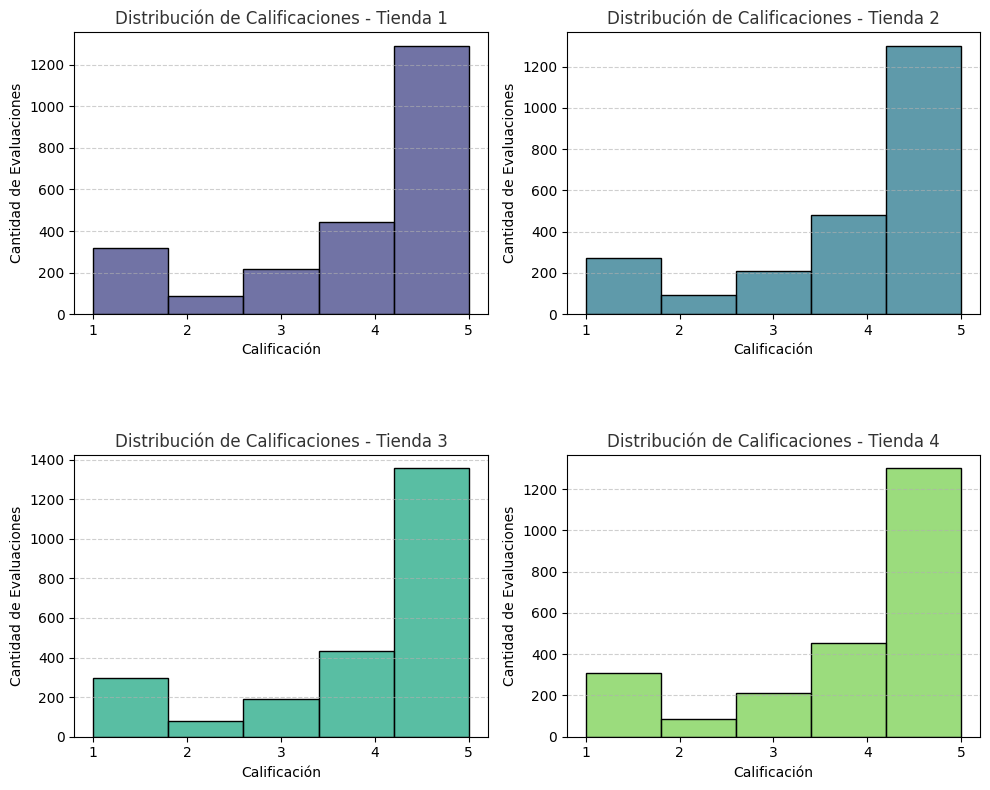

In [111]:
tiendas = sorted(df_tiendas['tienda'].unique())

paleta_colores = sns.color_palette("viridis", len(tiendas))

color_map = dict(zip(tiendas, paleta_colores))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
##Crea Grafico
for i, tienda in enumerate(tiendas):
    data_tienda = df_tiendas[df_tiendas['tienda'] == tienda]

    sns.histplot(
        data=data_tienda,
        x='Calificación',
        bins=5,
        kde=False,
        color=color_map[tienda],
        edgecolor='black',
        ax=axs[i]
    )

    axs[i].set_title(f'Distribución de Calificaciones - {tienda}', fontsize=12, color='#333333')
    axs[i].set_xlabel('Calificación')
    axs[i].set_ylabel('Cantidad de Evaluaciones')
    axs[i].set_xticks([1, 2, 3, 4, 5])
    axs[i].grid(axis='y', linestyle='--', alpha=0.6)

for j in range(i + 1, 4):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

## 4. Productos más y menos vendidos

productos mas y menos vendidos

In [112]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')

# Tabla Top 10 por tienda
tiendas = df_tiendas['tienda'].unique()

for tienda in tiendas:
    top10 = ventas_unidades[ventas_unidades['tienda'] == tienda] \
                .sort_values(by='Unidades_Vendidas', ascending=False) \
                .head(10) \
                .drop(columns='tienda')

    print(f"\nTop 10 productos más vendidos - {tienda}")
    display(top10.reset_index(drop=True))




Top 10 productos más vendidos - Tienda 1


,Producto,Unidades_Vendidas
0,Armario,60
1,TV LED UHD 4K,60
2,Microondas,60
3,Secadora de ropa,58
4,Mesa de noche,56
5,Bloques de construcción,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Impresora,54
9,Vaso térmico,54



Top 10 productos más vendidos - Tienda 2


,Producto,Unidades_Vendidas
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Pandereta,58
4,Guitarra acústica,58
5,Secadora de ropa,57
6,Iphone 15,55
7,Bloques de construcción,54
8,Armario,54
9,Set de ollas,52



Top 10 productos más vendidos - Tienda 3


,Producto,Unidades_Vendidas
0,Kit de bancas,57
1,Mesa de comedor,56
2,Cama king,56
3,Set de ollas,55
4,Mesa de noche,55
5,Smart TV,54
6,Modelado predictivo,53
7,Cuerda para saltar,53
8,Estufa,53
9,Carrito de control remoto,52



Top 10 productos más vendidos - Tienda 4


,Producto,Unidades_Vendidas
0,Cama box,62
1,Cubertería,59
2,Cama king,56
3,Dashboards con Power BI,56
4,Carrito de control remoto,55
5,Mesa de noche,55
6,Mesa de comedor,55
7,Bloques de construcción,54
8,Smart TV,54
9,Pandereta,52


/tmp/ipython-input-904807199.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


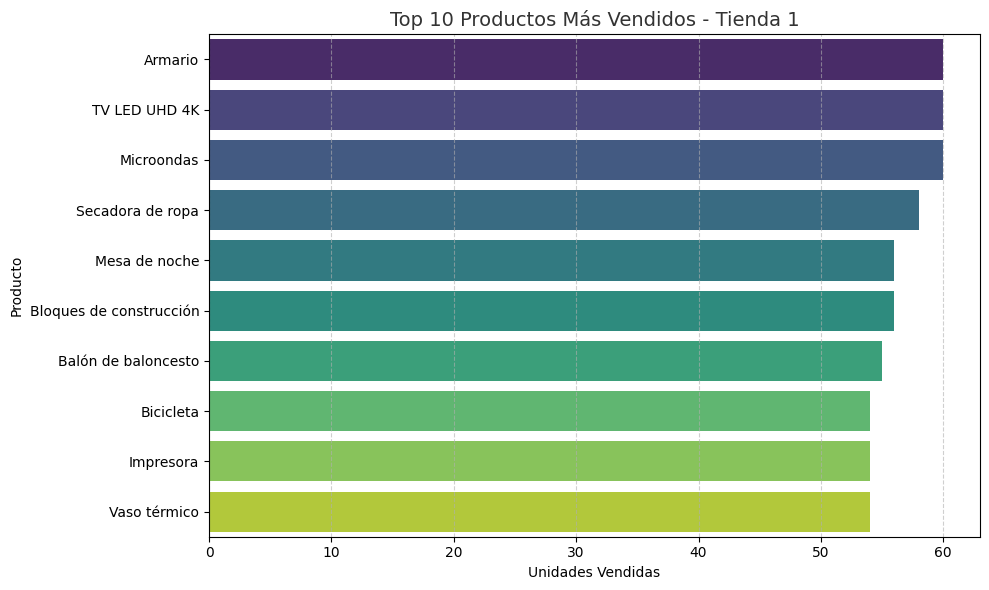

/tmp/ipython-input-904807199.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


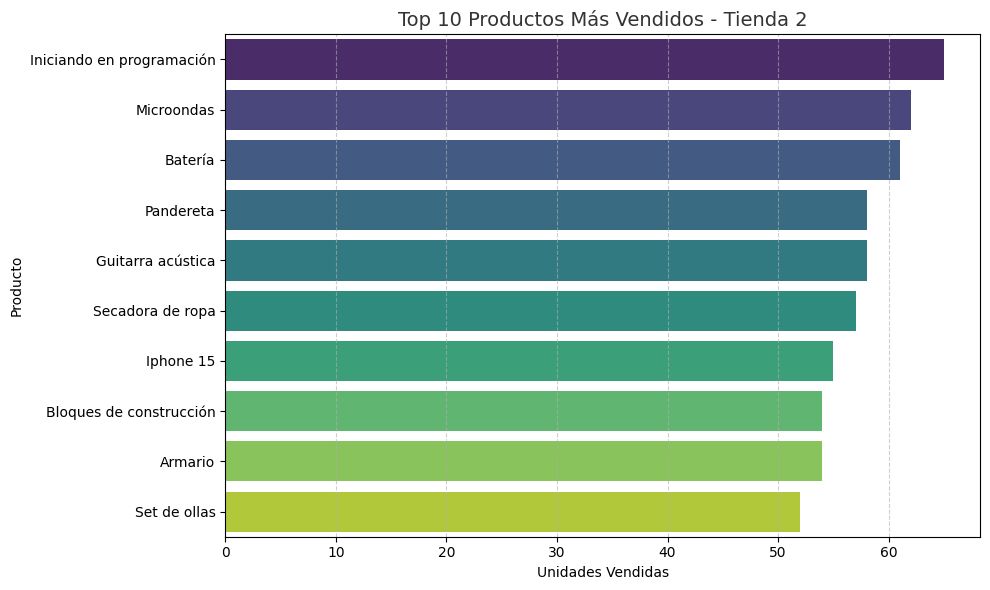

/tmp/ipython-input-904807199.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


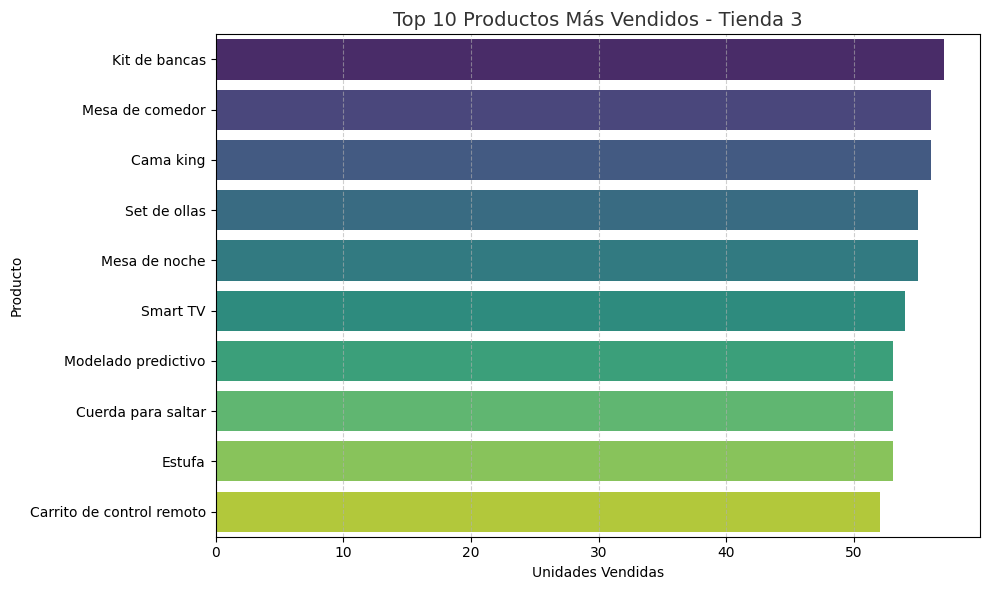

/tmp/ipython-input-904807199.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


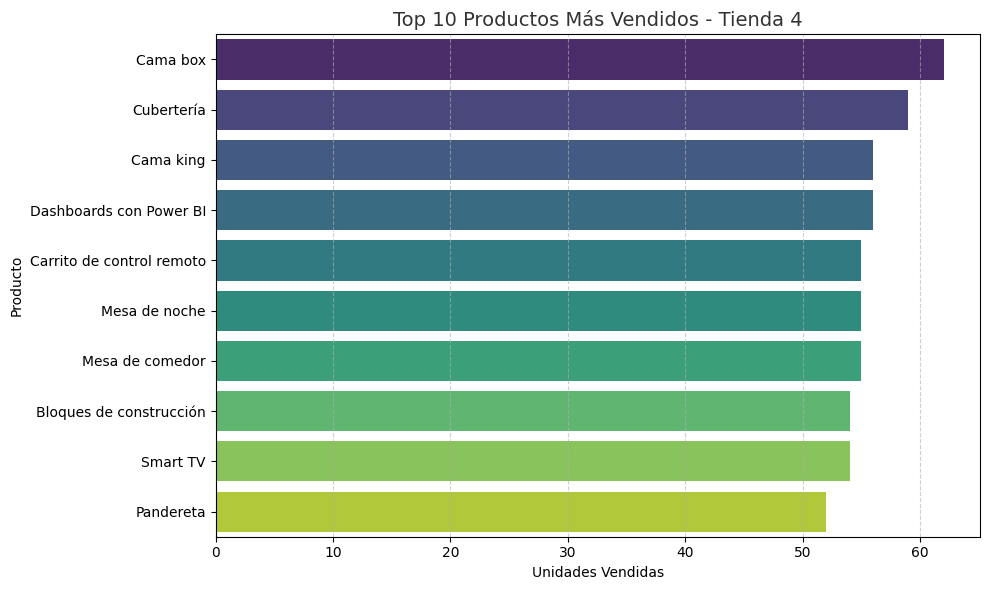

In [113]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')

tiendas = sorted(df_tiendas['tienda'].unique())
# Crea gráficos
for tienda in tiendas:
    top10 = ventas_unidades[ventas_unidades['tienda'] == tienda] \
                .sort_values(by='Unidades_Vendidas', ascending=False) \
                .head(10)

    productos = top10['Producto'].unique()
    palette = sns.color_palette("viridis", len(productos))
    color_map = dict(zip(productos, palette))

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top10,
        y='Producto',
        x='Unidades_Vendidas',
        palette=color_map
    )

    plt.title(f'Top 10 Productos Más Vendidos - {tienda}', fontsize=14, color='#333333')
    plt.xlabel('Unidades Vendidas')
    plt.ylabel('Producto')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

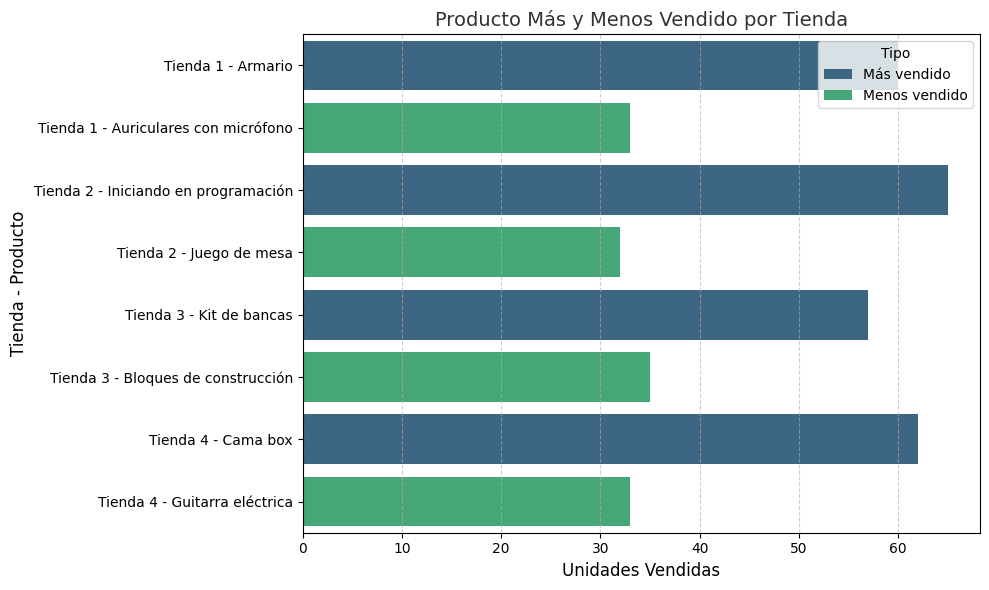

In [114]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')
resumen = []
for tienda in ventas_unidades['tienda'].unique():
    datos_tienda = ventas_unidades[ventas_unidades['tienda'] == tienda]

    # Producto más vendido
    producto_max = datos_tienda.loc[datos_tienda['Unidades_Vendidas'].idxmax()]
    resumen.append({
        'Tienda': tienda,
        'Producto': producto_max['Producto'],
        'Unidades_Vendidas': producto_max['Unidades_Vendidas'],
        'Tipo': 'Más vendido'
    })

    # Producto menos vendido
    producto_min = datos_tienda.loc[datos_tienda['Unidades_Vendidas'].idxmin()]
    resumen.append({
        'Tienda': tienda,
        'Producto': producto_min['Producto'],
        'Unidades_Vendidas': producto_min['Unidades_Vendidas'],
        'Tipo': 'Menos vendido'
    })

df_resumen = pd.DataFrame(resumen)
df_resumen['Etiqueta'] = df_resumen['Tienda'] + ' - ' + df_resumen['Producto']

tipos = ['Más vendido', 'Menos vendido']
palette_viridis = sns.color_palette("viridis", n_colors=2)
palette = dict(zip(tipos, palette_viridis))

# Crea gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_resumen,
    x='Unidades_Vendidas',
    y='Etiqueta',
    hue='Tipo',
    palette=palette
)

# Personalización
plt.title('Producto Más y Menos Vendido por Tienda', fontsize=14, color='#333333')
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Tienda - Producto', fontsize=12)
plt.legend(title='Tipo')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [115]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')
tiendas = df_tiendas['tienda'].unique()

# Top 5 de productos menos vendidos por tienda
for tienda in tiendas:
    top5_menos = ventas_unidades[ventas_unidades['tienda'] == tienda] \
                    .sort_values(by='Unidades_Vendidas', ascending=True) \
                    .head(5) \
                    .drop(columns='tienda')

    print(f"\nTop 5 productos menos vendidos - {tienda}")
    display(top5_menos.reset_index(drop=True))


Top 5 productos menos vendidos - Tienda 1


,Producto,Unidades_Vendidas
0,Auriculares con micrófono,33
1,Celular ABXY,33
2,Olla de presión,35
3,Pandereta,36
4,Ciencia de datos con Python,39



Top 5 productos menos vendidos - Tienda 2


,Producto,Unidades_Vendidas
0,Juego de mesa,32
1,Impresora,34
2,Mesa de comedor,34
3,Sillón,35
4,Auriculares,37



Top 5 productos menos vendidos - Tienda 3


,Producto,Unidades_Vendidas
0,Bloques de construcción,35
1,Set de vasos,36
2,Mochila,36
3,Microondas,36
4,Vaso térmico,38



Top 5 productos menos vendidos - Tienda 4


,Producto,Unidades_Vendidas
0,Guitarra eléctrica,33
1,Armario,34
2,Guitarra acústica,37
3,Ciencia de datos con Python,38
4,Lavadora de ropa,38


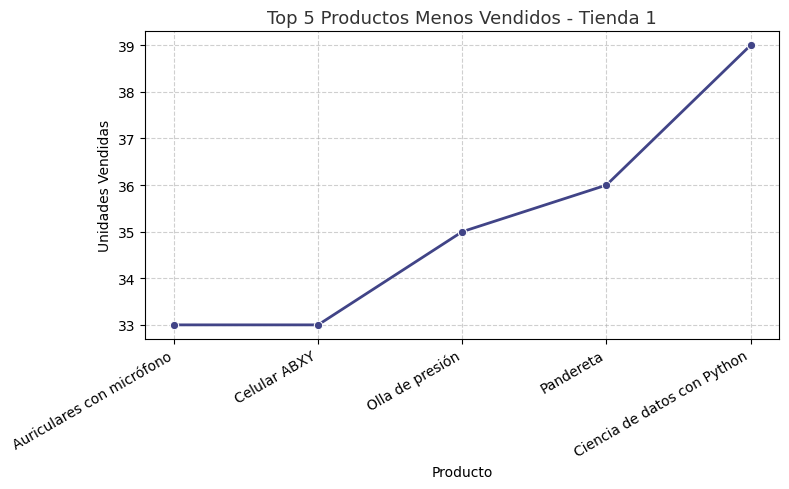

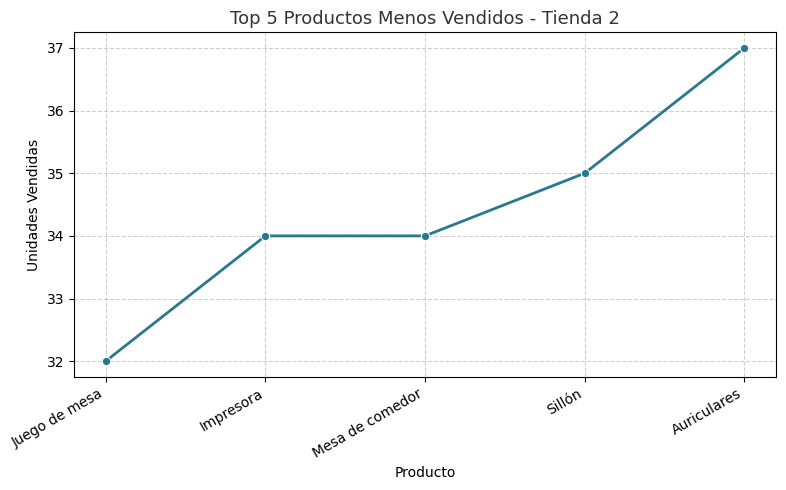

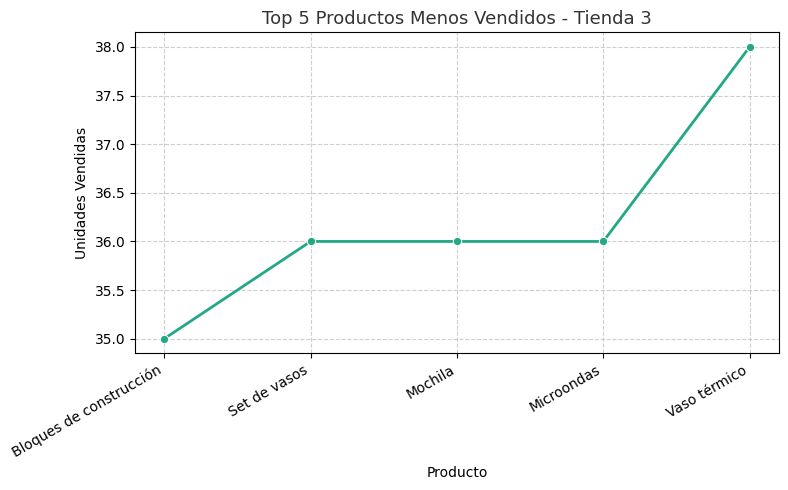

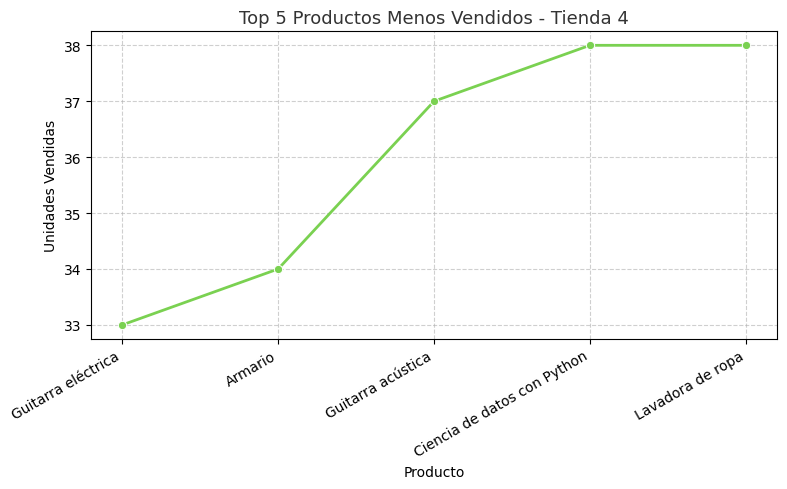

In [116]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')
tiendas = sorted(df_tiendas['tienda'].unique())
paleta_colores = sns.color_palette("viridis", len(tiendas))
color_map = dict(zip(tiendas, paleta_colores))

# Crea gráfico
for tienda in tiendas:
    top5_menos = ventas_unidades[ventas_unidades['tienda'] == tienda] \
                    .sort_values(by='Unidades_Vendidas', ascending=True) \
                    .head(5)

    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=top5_menos,
        x='Producto',
        y='Unidades_Vendidas',
        marker='o',
        linewidth=2,
        color=color_map[tienda]
    )

    plt.title(f'Top 5 Productos Menos Vendidos - {tienda}', fontsize=13, color='#333333')
    plt.xlabel('Producto')
    plt.ylabel('Unidades Vendidas')
    plt.xticks(rotation=30, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

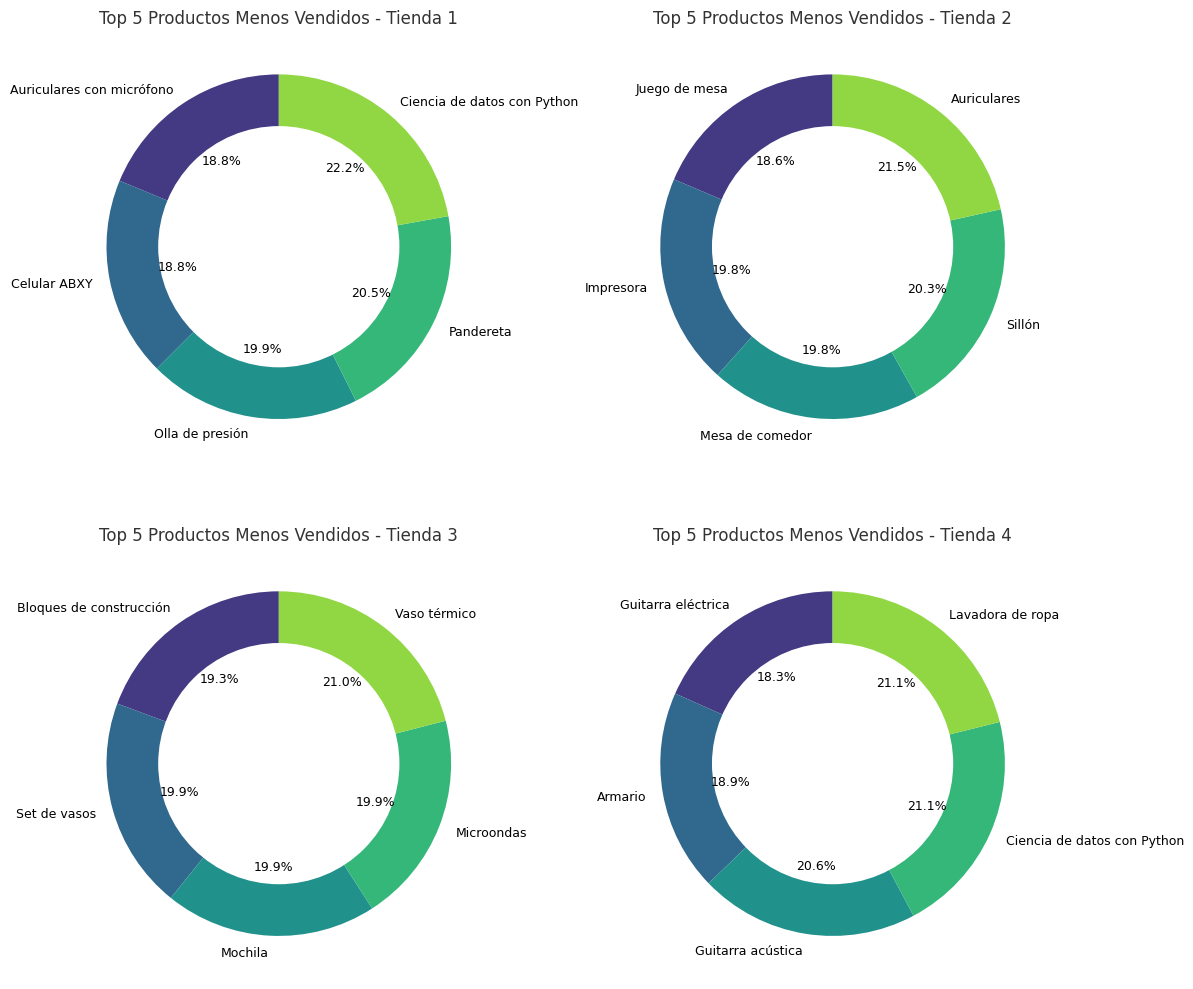

In [118]:
ventas_unidades = df_tiendas.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Unidades_Vendidas')
tiendas = sorted(df_tiendas['tienda'].unique())

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, tienda in enumerate(tiendas):
    ax = axs[i]

    # Top 5 productos menos vendidos
    top5_menos = ventas_unidades[ventas_unidades['tienda'] == tienda] \
                    .sort_values(by='Unidades_Vendidas', ascending=True) \
                    .head(5)

    productos = top5_menos['Producto']
    unidades = top5_menos['Unidades_Vendidas']

    colores = sns.color_palette("viridis", n_colors=len(productos))

    # Crea gráfico
    wedges, texts, autotexts = ax.pie(
        unidades,
        labels=productos,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        textprops={'fontsize': 9, 'color': 'black'}
    )

    centro = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centro)

    ax.set_title(f'Top 5 Productos Menos Vendidos - {tienda}', fontsize=12, color='#333333')

if len(tiendas) < 4:
    for j in range(len(tiendas), 4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()

## 5. Envío promedio por tienda

Costo promedio del envío

In [119]:
promedio_envio = df_tiendas.groupby('tienda')['Costo de envío'].mean().reset_index()

promedio_envio.rename(columns={'Costo de Envio': 'Promedio Costo de Envío'}, inplace=True)

print("Promedio de Costo de Envío por Tienda")
display(promedio_envio)


Promedio de Costo de Envío por Tienda


,tienda,Costo de envío
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


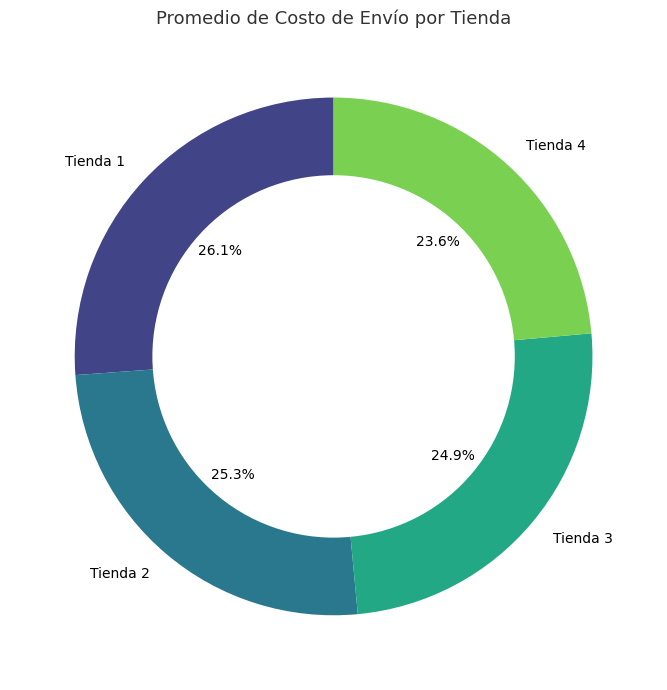

In [120]:
promedio_envio = df_tiendas.groupby('tienda')['Costo de envío'].mean().reset_index()
tiendas = promedio_envio['tienda']
costos = promedio_envio['Costo de envío']

colores = sns.color_palette("viridis", n_colors=len(tiendas))

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    costos,
    labels=tiendas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 10, 'color': 'black'}
)

centro = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

plt.title('Promedio de Costo de Envío por Tienda', fontsize=13, color='#333333')
plt.tight_layout()
plt.show()

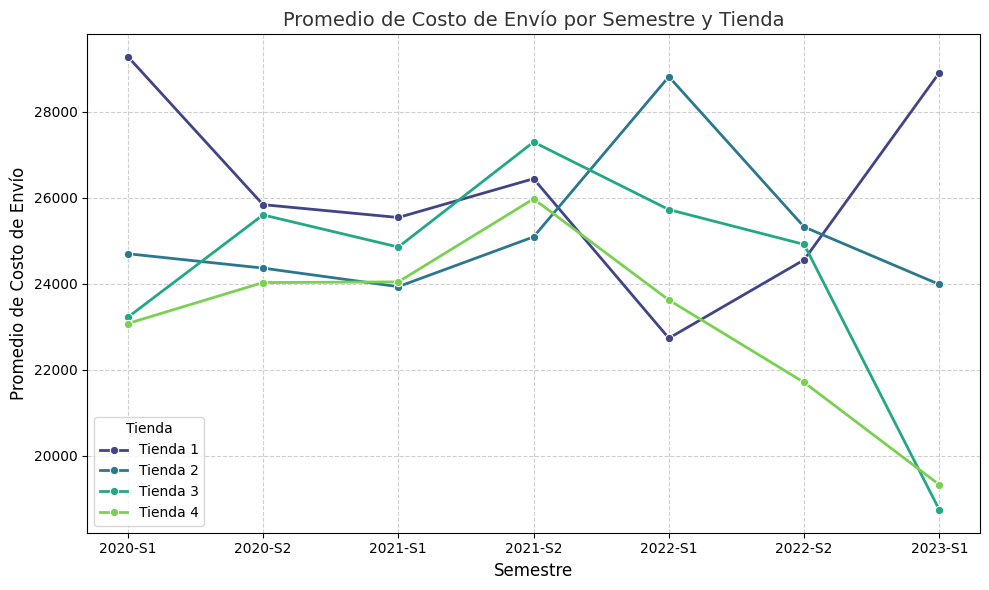

In [121]:
df_tiendas['Semestre'] = df_tiendas['Fecha de Compra'].dt.year.astype(str) + '-S' + \
                         df_tiendas['Fecha de Compra'].dt.month.apply(lambda x: '1' if x <= 6 else '2')

promedio_envio_semestre = df_tiendas.groupby(['tienda', 'Semestre'])['Costo de envío'].mean().reset_index()

promedio_envio_semestre['Semestre'] = pd.Categorical(
    promedio_envio_semestre['Semestre'],
    categories=sorted(promedio_envio_semestre['Semestre'].unique()),
    ordered=True
)

tiendas = sorted(promedio_envio_semestre['tienda'].unique())

paleta_colores = sns.color_palette("viridis", n_colors=len(tiendas))
color_map = dict(zip(tiendas, paleta_colores))

# Crea gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=promedio_envio_semestre,
    x='Semestre',
    y='Costo de envío',
    hue='tienda',
    marker='o',
    linewidth=2,
    palette=color_map
)

# Personalización
plt.title('Promedio de Costo de Envío por Semestre y Tienda', fontsize=14, color='#333333')
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Promedio de Costo de Envío', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


Costo promedio de envío por categoría

/tmp/ipython-input-2180494563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2180494563.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


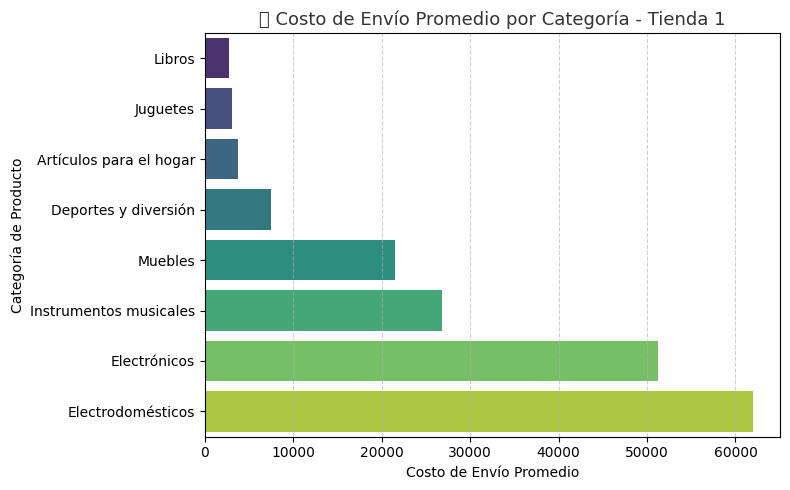

/tmp/ipython-input-2180494563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2180494563.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


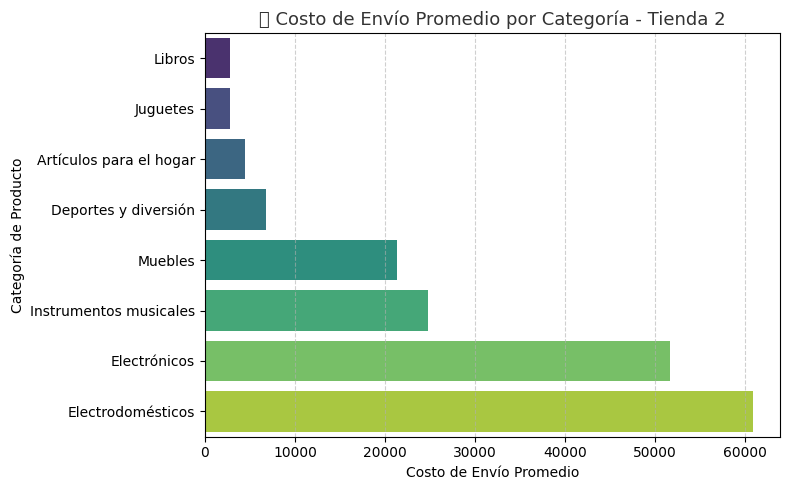

/tmp/ipython-input-2180494563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2180494563.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


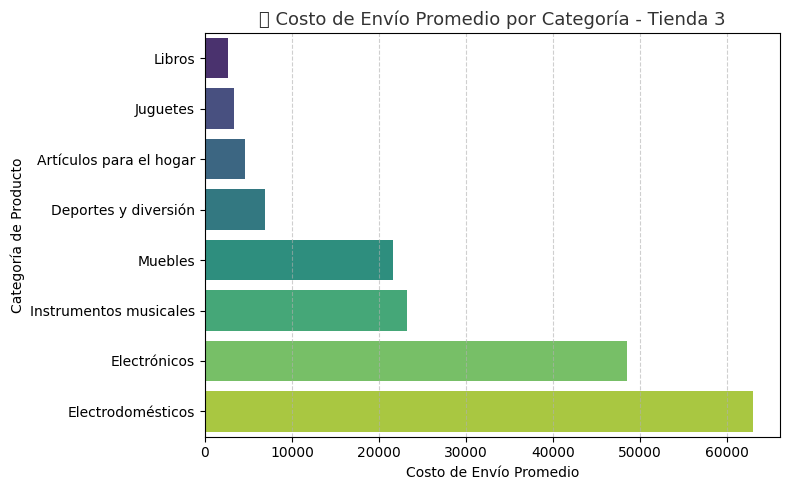

/tmp/ipython-input-2180494563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2180494563.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


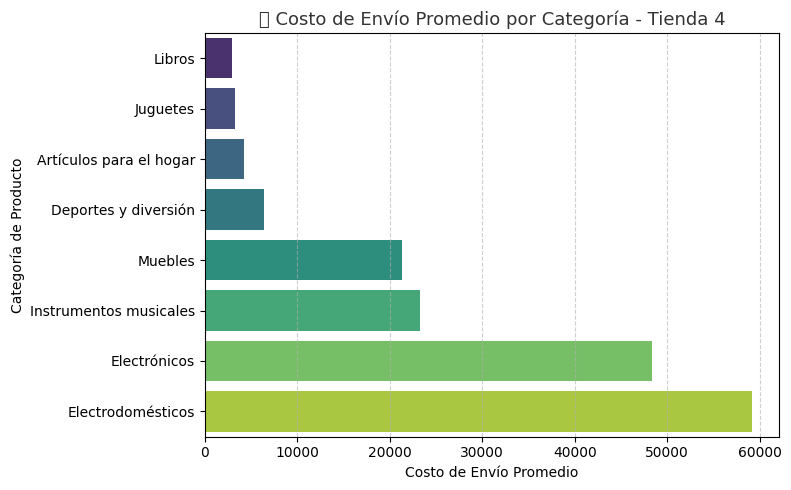

In [86]:
promedio_envio_categoria = df_tiendas.groupby(['tienda', 'Categoría del Producto'])['Costo de envío'].mean().reset_index()

tiendas = sorted(promedio_envio_categoria['tienda'].unique())

# Crea gráfico
for tienda in tiendas:
    data_tienda = promedio_envio_categoria[promedio_envio_categoria['tienda'] == tienda] \
                    .sort_values(by='Costo de envío', ascending=True)

    plt.figure(figsize=(8, 5))

    colores = sns.color_palette("viridis", n_colors=len(data_tienda))

    sns.barplot(
        data=data_tienda,
        x='Costo de envío',
        y='Categoría del Producto',
        palette=colores
    )
    plt.title(f'Costo de Envío Promedio por Categoría - {tienda}', fontsize=13, color='#333333')
    plt.xlabel('Costo de Envío Promedio')
    plt.ylabel('Categoría de Producto')

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



#Informe Gerencial: Hallazgos Clave y Sugerencias

##Introducción

El presente documento tiene como objetivo realizar un análisis de las cuatro tiendas Alura Store del Sr. Juan, correspondiente al período comprendido entre los años 2020 y 2023. Para ello, se llevó a cabo una exploración de los datos asociados a las ventas de dichas tiendas, considerando aspectos como la facturación, los costos de envío, las ventas por categoría de productos, los productos con mayores y menores volúmenes de ventas, así como la calificación otorgada por los clientes.

Este análisis permitirá determinar cuál de las tiendas debería ser cerrada con el fin de maximizar las ganancias.

##Análisis

### **Ventas**

- Se observa una **disminución sostenida de las ventas durante 2023** en comparación con los mismos períodos de años anteriores.  
- En **Q4 2021**, la **Tienda 3** presentó un **incremento significativo en las ventas**.  
  - *Recomendación:* analizar las estrategias comerciales aplicadas en dicho período para identificar buenas prácticas replicables.  
- Las **Tiendas 1 y 2** son las que históricamente presentan **mayores volúmenes de ventas**, alternando el liderazgo en diferentes años.  
- Entre **Q4 2022 y Q1 2023**, se registró una **disminución considerable de ventas** en las **Tiendas 2, 3 y 4**.  
- La **Tienda 4** muestra una **caída constante de ventas desde Q1 2022**, con una leve recuperación en **Q3 2022**, pero sin lograr estabilizarse.  
  - La caída está principalmente asociada a la disminución de ventas en las categorías de **Electrónicos** y **Electrodomésticos**, que representan la mayor parte de sus ingresos.  

---

### **Calificaciones**

- En promedio, **todas las tiendas mantienen buenas calificaciones**, superiores a 3,7 en una escala de 1 a 5.  
- La **Tienda 3** es la que **ha obtenido las mejores calificaciones promedio** considerando el período 2020-2023.  
- En **2022**, la **Tienda 4** recibió las **peores calificaciones promedio**; sin embargo, en **2023** se posicionó como la tienda con **mejores evaluaciones**.  
- La **Tienda 1** ha presentado **caídas notorias en las calificaciones** en **Q1 2020, Q1 2021 y Q4 2024**.  
  - *Recomendación:* investigar los factores que provocaron estas caídas y reforzar acciones de mejora en la atención al cliente.  

---

# **Conclusiones y Recomendaciones Generales**
- La **Tienda 4** enfrenta un desempeño preocupante en términos de ventas, con una caída persistente desde 2022, especialmente en categorías clave como **Electrónicos** y **Electrodomésticos**.  
  - Se recomienda evaluar en detalle su rentabilidad y definir si es viable implementar estrategias de recuperación o considerar su cierre.  
- La **Tienda 3** presenta fortalezas en calificaciones y períodos de alto desempeño en ventas (Q4 2021). Sería estratégico **replicar sus mejores prácticas** en el resto de las tiendas.  
- La **Tienda 1 y Tienda 2** mantienen un liderazgo en ventas, pero es clave reforzar la satisfacción de los clientes en la Tienda 1, donde se han detectado caídas puntuales en las calificaciones.  
- Se sugiere implementar **estrategias comerciales y de fidelización** enfocadas en los períodos de baja (ej. Q4 2022 a Q1 2023), con campañas específicas por categorías de productos.  
- Realizar un **análisis profundo de las categorías de mayor peso** en cada tienda para diversificar la oferta y reducir riesgos por dependencia en pocas líneas de productos.  